# Empalme con la clase anterior

En el metodo de AdaGrad, el "learning parameter" esta dado por

$$\eta^{(i)} = \frac{\eta}{\sqrt{G^{(i)} + \epsilon}} . \tag{1}$$
El $\epsilon > 0$ es para evitar division por cero o valores muy pequenhos.

Quien es $G^{(i)}$?

Es suma (acumulado sobre la historia del desplazaminto)
$$G^{(i)} = \sum_{j=1}^i g^{(j)} \circ g^{(j)}.$$
donde $\circ$ es producto Hadamardi, y  $g^{(j)}$
es un vector, donde las componentes corresponden a la
componente $k$ del gradiente, para cada iteracion.
Mas claramente

Si
$$ g_k = (g_k^{(1)}, g_k^{(2)}, \cdots, g_k^{(i)}) \quad k=1,2, \cdots, n .$$
y
$$  g^{(j)} = (g_1^{(j)}, g_2^{(j)}, \cdots , g_n^{(j)} ) \quad , \quad  j=1,2, \cdots , i  ,$$

el producto hadamard
$$g^{(k)} \circ g^{(k)} =  ((g_1^{(k)})^2, (g_2^{(k)})^2, \cdots, (g_n^{(k)})^2) \quad k=1,2, \cdots, n .$$
De forma que

$$G^{(i)} = ( \| g_1  \|^2, \| g_2 \|^2 , \cdots , \| g_n \|^2)  .$$
La historia acumulada de cada componente del gradiente.

En la formula (2) parece haber un error de dimensiones por que se divide por un vector. Se puede dividir por un vector?, no
Entonces la formula adecuada es


$$\eta_k^{(i)} = \frac{\eta}{\sqrt{G_k^{(i)} + \epsilon}} . \tag{2}$$

Lo que realmente hace el algoritmo es:


$$\theta^{(i)} = \theta^{(i-1)} - \eta^{(i)} \circ g^{(i)} .$$
Tenemos al final, de nuevo, un producto Hadamard, que se hace
componente a componente.




## Explicacion en forma matricial. Observe las siguientes ecuaciones


\begin{eqnarray}
g = ( g_k^{(i)}) =
\begin{pmatrix}
g_1^{(1)} & g_2^{(1)} & \cdots & g_n^{(1)}  \\
g_1^{(2)} & g_2^{(2)} & \cdots & g_n^{(2)}  \\
\vdots & \vdots & \ddots & \vdots \\
g_1^{(m)} & g_2^{(m)} & \cdots & g_n^{(m)}  \\
\end{pmatrix} \quad k=1, 2, \cdots, n \quad , \quad i=1,2, \cdots, m
\end{eqnarray}
$n$ es la dimension del dominio $\theta \in \mathbb{R}^n.$
Aca

$$ g_k^{(i)}  = \frac{\partial C}{\partial \theta_k^{(i)}} .$$
Observamos que la una columna $k$ de $g$ es $g_k$, como la definimos arriab, y una fila es $g^{(i)}$.

Que tan bueno es reconstruir **toda** la historia del gradiente.
Aparentemente esta bien pero la historia es acumulativa y puede crear numeros grandes que empujen $\eta^{(i)}$ a 0, en  la ecuacion $(1)$ para cada $k$.

Explicacion. **que quiere decir que el sistema deja de aprender**.

$$ \theta^{(i+1)} = \theta^{(i)} - \eta \nabla C(\theta^{(i)}) .$$
Si $\eta \approx 0$ entonces

$\theta^{(i+1)} \approx \theta^{(i)}$.
No hay avance, el sistema no aprende.



# AdaDelta:
Como el AdaGrad es **acumulativo**, el $G$ puede crecer mucho y hacer decrecer el $\eta$, y el sistema **para** de aprender,
entonces Matthew D. Zeiler (2012) introdujo el AdaDelta.

El AdaDelta es como el AdaGrad, pero en vez de considerar toda la historia desde $1$ hasta $i$ considera una ventana en esta historia.

Veamos esto matematicamente. Para del AdaDelta


$$G^{(i)} = \sum_{max \{ i - w, 1 \}}^i g^{j} \circ g^{(j)} .$$
donde $w$ es el tamano de la ventana. Veamos casos.

1. Si $w=0$, Estamos suamando de $i$ a $i$, un solo termino, y puntual, local, y a veces deseado. No existe la historia.

2. Si $w=i-1$, entonces el indice inferior comienza en $i-(i-1)=1$ y tenemos el AdaGrad  (toda la historia).

3. En general  el AdaDelta permite vamores $ 0 \le w < i$
La idea al final es que $G$ no crezca mucho y $\eta$ no disminuya mucho.



# RMSprop: (progragacion Root Mean Square (el cuadrado de la raiz media)
Este metodo es el primero de todos los que vemos en esta clase al cual no se le tiene una referencia. Esta tecnica fue introducidad por [Geoffrey Hinton](https://en.wikipedia.org/wiki/Geoffrey_Hinton) con el fin de establecer "el mejor de los dos mundos" (un **hibrido**) entre momentum y AdaGrad. La contribucion del momentum es hacer una propagacion con un decaimiento exponencial (tarea). Con esto no necesitamos la ventanda del AdaDelta, por que las amplitudes se controlan con ese decaimiento exponencial. El algoritmo es el siguiente.

\begin{eqnarray}
v^{(i)} &=& \beta v^{(i-1)} + (1 - \beta) g^{(i)} \circ g^{(i)} \\
\theta^{(i)} &=& \theta^{(i-1)} - \frac{\eta}{\sqrt{v^{(i)}+ \epsilon}}.
\end{eqnarray}

Tambien se puede pensar en el hibrido con Nesterov en vez de Momentum, aca en vez usar el gradiente $g$ en  $\theta^{(i-1)}$,
se calcula en $\theta^{i-1} + \beta v^{(i-1)}$.







# Adam (Adaptive momenta): Se consideran dos momentos,
Introducido por Kingma y Ba, 2017.

primer (orden 1) y segundo (orden 2) mementos.
Inicialmente el algoritmo es:


\begin{eqnarray}
s^{(i)} &=& \beta_1 s^{(i-1)} + (1- \beta_1) g^{(i)} \\
t^{(i)} &=& \beta_2 t^{(i-1)} + (1 - \beta_2) g^{(i)} \circ g^{(i)} \\
\theta^{(i)} &=& \theta^{(i-1)} - \frac{\eta s^{(i)}}{t^{(i)} + \epsilon}.
\end{eqnarray}
Los autores son Kingma y Ba, del 2017.

Los autores sugieren $\beta=0.9$, $\beta_2=0.999$. Con esto y asumiento $s^{(0)}=0$, $t^{(0)}$, tenemos

\begin{eqnarray}
s^{(1)} = 0.1 g^{(1)} \\
t^{(1)} = 0.001 g^{(1)} \circ g^{(1)} \\
\theta^{(1)} = \theta^{(0)} - \frac{\eta s^{(1)}}{\sqrt{t^{(1)} + \epsilon}}.
\end{eqnarray}

De nuevo, se piensa que $t$ podria crecer para $\| g \| \ge 1$,
los autores vieron que mejora el algoritmo si introducen unas "normalizaciones".
De la siguiente

\begin{eqnarray}
s^{(i)} &=& \beta_1 s^{(i-1)} + (1- \beta_1) g^{(i)} \\
t^{(i)} &=& \beta_2 t^{(i-1)} + (1 - \beta_2) g^{(i)} \circ g^{(i)} \\
s^{(i)} &\leftarrow & \frac{s^{(i)}}{1 - \beta_1^2} \\
t^{(i)} &\leftarrow & \frac{t^{(i)}}{1 - \beta_2^2} \\
\theta^{(i)} &=& \theta^{(i-1)} - \frac{\eta s^{(i)}}{t^{(i)} + \epsilon}.
\end{eqnarray}

Con esto:
\begin{eqnarray}
s^{(1)} = \frac{0.1 g^{(1)}}{0.2} \approx 0.525 g^{(1)} \\
t^{(1)} = \frac{0.001g^{(1)}}{0.002} \approx 0.5 g^{(1)} \circ g^{(1)}.
\end{eqnarray}

A esta tecnica de noramlizacion se le llama **bias correction**, para evitar numeros muy pequenos o muy grandes.

# Demos:
## Funciones para probar algoritmos de optimizacion
[Funciones de prueba para optimizacion](https://en.wikipedia.org/wiki/Test_functions_for_optimization).


[Rosenbrock](https://en.wikipedia.org/wiki/Rosenbrock_function)

Otra que encuentra en Wikipedia (interesante)
$$f(x,y) = (1.5 - x + xy)^2 + (2.25 - x + xy^2)^2 + (2.625 - x + xy^3)^2 .$$
A esta se le llama la Beale function
Veamos una grafica.



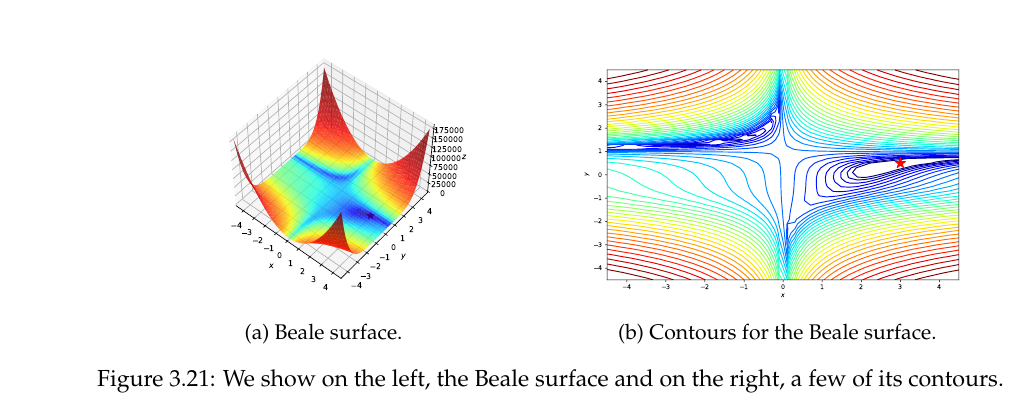

# Codigos de optimizacion en Python.
[optimizers numpy](https://github.com/ilguyi/optimizers.numpy)

El sitio
[Lili Jiang's Github site](https://github.com/lilipads/gradient_descent_viz) muestra el codigo de Lili Jiang
y
[Towards de Data Science](https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c)  explica los metodos (tal vez exceptuando el AdaDelta) estudiados en este curso de forma grafica, interesante.

Para acabar la clase dos funciones

* Aclkey
$$f(x) =-a \exp \left ( -b \sqrt{ \frac1n \sum_{i=1}^n x_i^2} \right )  - \exp \left ( \frac1n \sum_{i=1}^n \cos ( c x_i) \right ) + a + \exp(1).$$
Si usamos los parametros $n=2, a=20, b=0.2$ obtenemos
-






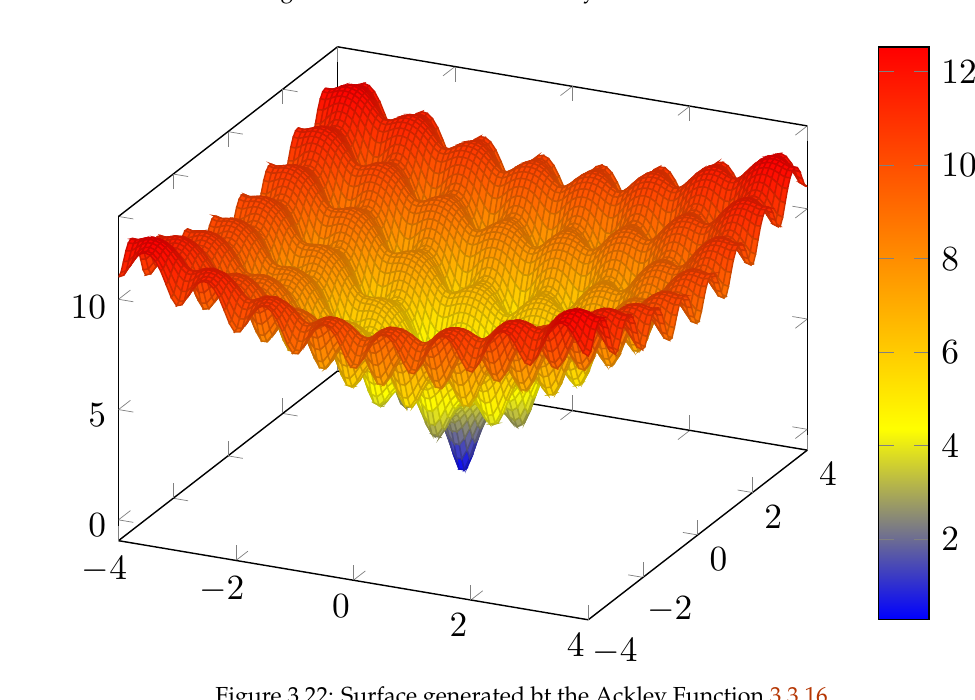

La ventaja para nostros es que este no es el tipo de funciones que encontramos en DL.
:
De tarea le dejo que mire la Rastrigin.

# Proxima clase: Funciones de costo y comenzamos con ANN: Artificial Neural Networks.